In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('../data/data.csv')
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [36]:
df.shape

(95662, 16)

In [35]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
95657    False
95658    False
95659    False
95660    False
95661    False
Length: 95662, dtype: bool

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Summary statistics for numerical columns
print("Numerical Summary:\n", df.describe())

Numerical Summary:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [13]:
numeric_data = df.select_dtypes(include=['number'])
print("Numeric Columns:\n", numeric_data.columns)


Numeric Columns:
 Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')


In [16]:
##dispersion
# Range
range = numeric_data.max() - numeric_data.min()
print("Range:\n", range)

# Variance
variance = numeric_data.var()
print("\nVariance:\n", variance)

# Standard Deviation
std_dev = numeric_data.std()
print("\nStandard Deviation:\n", std_dev)

# IQR
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
print("\nInterquartile Range (IQR):\n", iqr)

Range:
 CountryCode               0.0
Amount             10880000.0
Value               9879998.0
PricingStrategy           4.0
FraudResult               1.0
dtype: float64

Variance:
 CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64

Standard Deviation:
 CountryCode             0.000000
Amount             123306.797164
Value              123122.087776
PricingStrategy         0.732924
FraudResult             0.044872
dtype: float64

Interquartile Range (IQR):
 CountryCode           0.0
Amount             2850.0
Value              4725.0
PricingStrategy       0.0
FraudResult           0.0
dtype: float64


In [18]:
skewness = numeric_data.skew()
print("Skewness:\n", skewness)

Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [19]:
kurtosis = numeric_data.kurt()
print("Kurtosis:\n", kurtosis)

Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


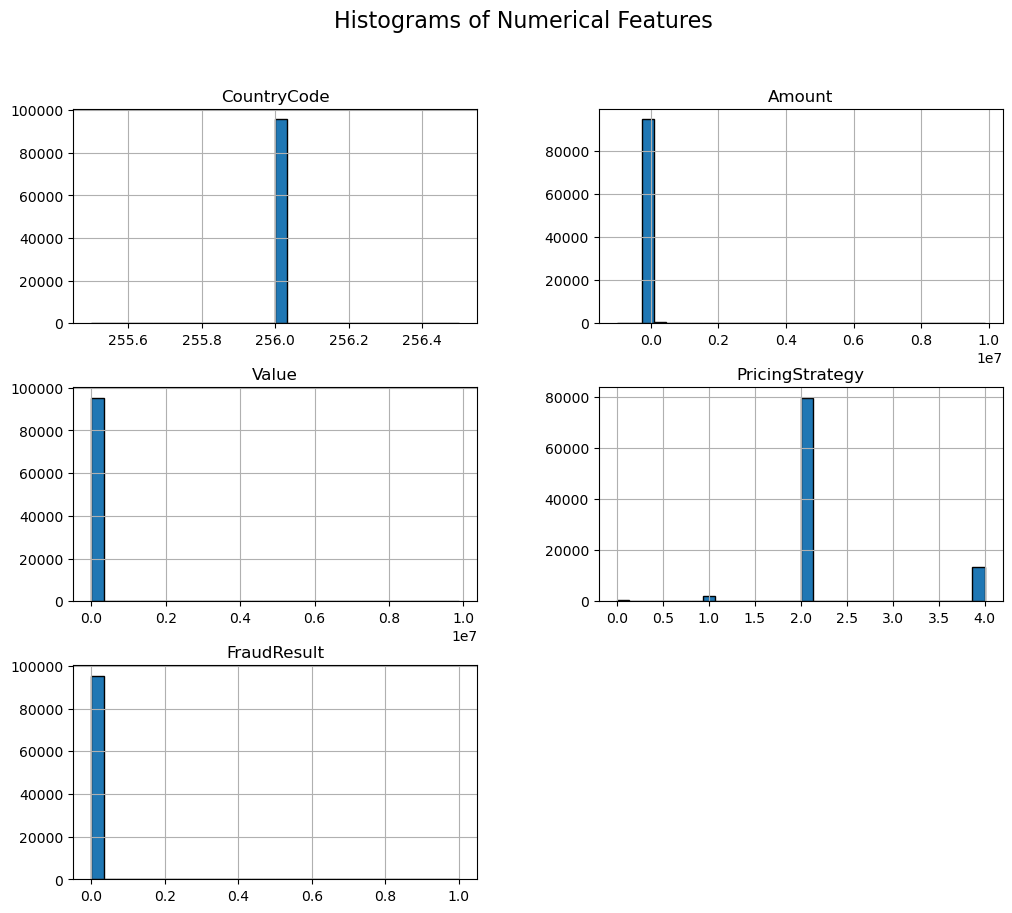

In [20]:
##Histograms: For general distribution and skewness.
numeric_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_29732\1633798525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_data[column], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_29732\1633798525.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(numeric_data[column], shade=True)


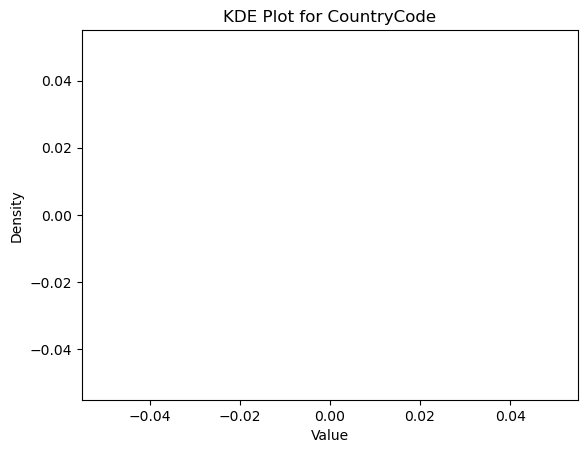

C:\Users\hp\AppData\Local\Temp\ipykernel_29732\1633798525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_data[column], shade=True)


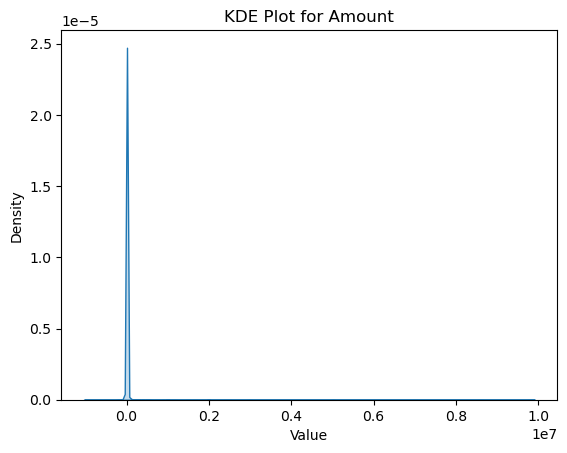

C:\Users\hp\AppData\Local\Temp\ipykernel_29732\1633798525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_data[column], shade=True)


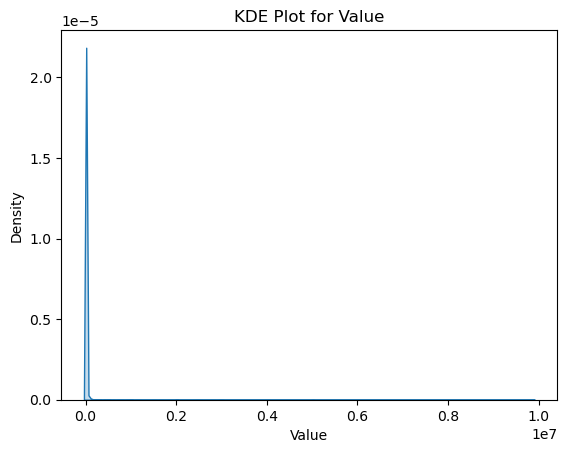

C:\Users\hp\AppData\Local\Temp\ipykernel_29732\1633798525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_data[column], shade=True)


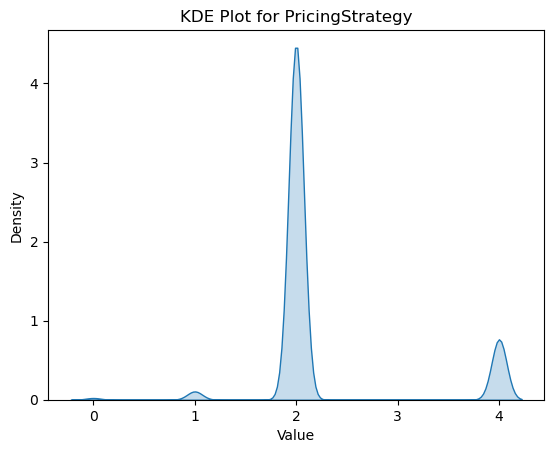

C:\Users\hp\AppData\Local\Temp\ipykernel_29732\1633798525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_data[column], shade=True)


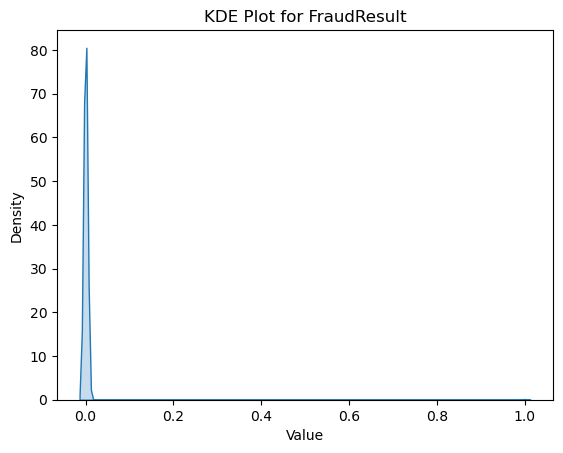

In [21]:
##KDE Plots: For smooth density visualization.
for column in numeric_data.select_dtypes(include=['number']).columns:
    sns.kdeplot(numeric_data[column], shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()


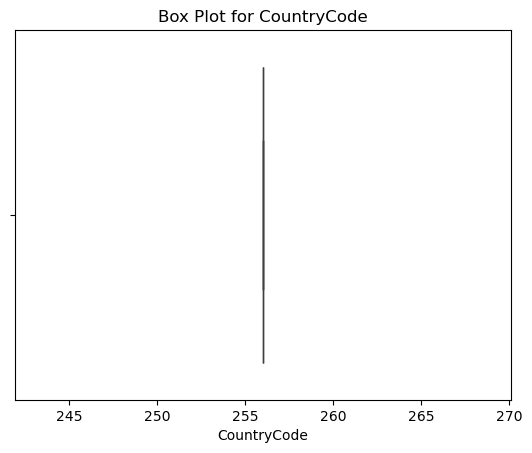

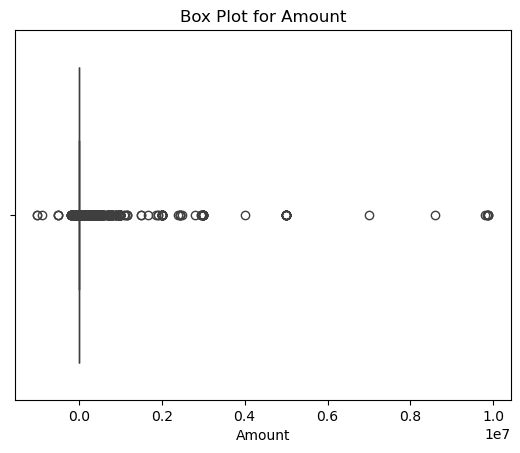

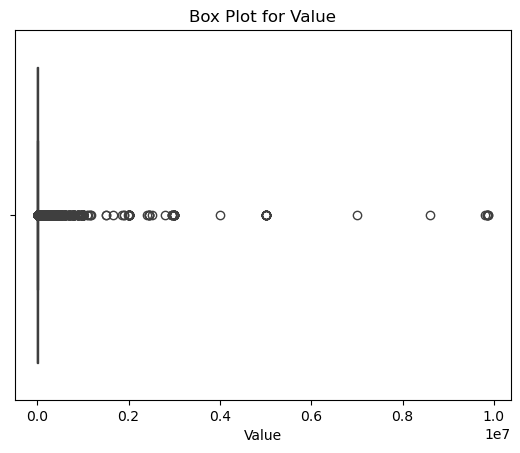

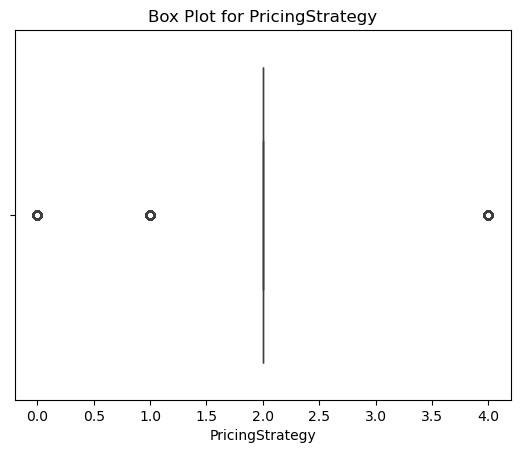

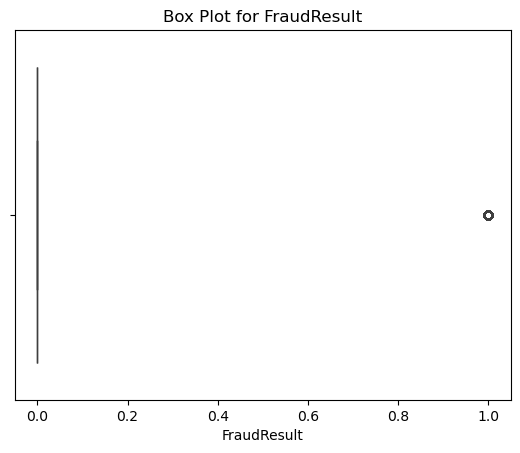

In [22]:
##Box/Violin Plots: For outliers and range comparison.
for column in numeric_data.select_dtypes(include=['number']).columns:
    sns.boxplot(x=numeric_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

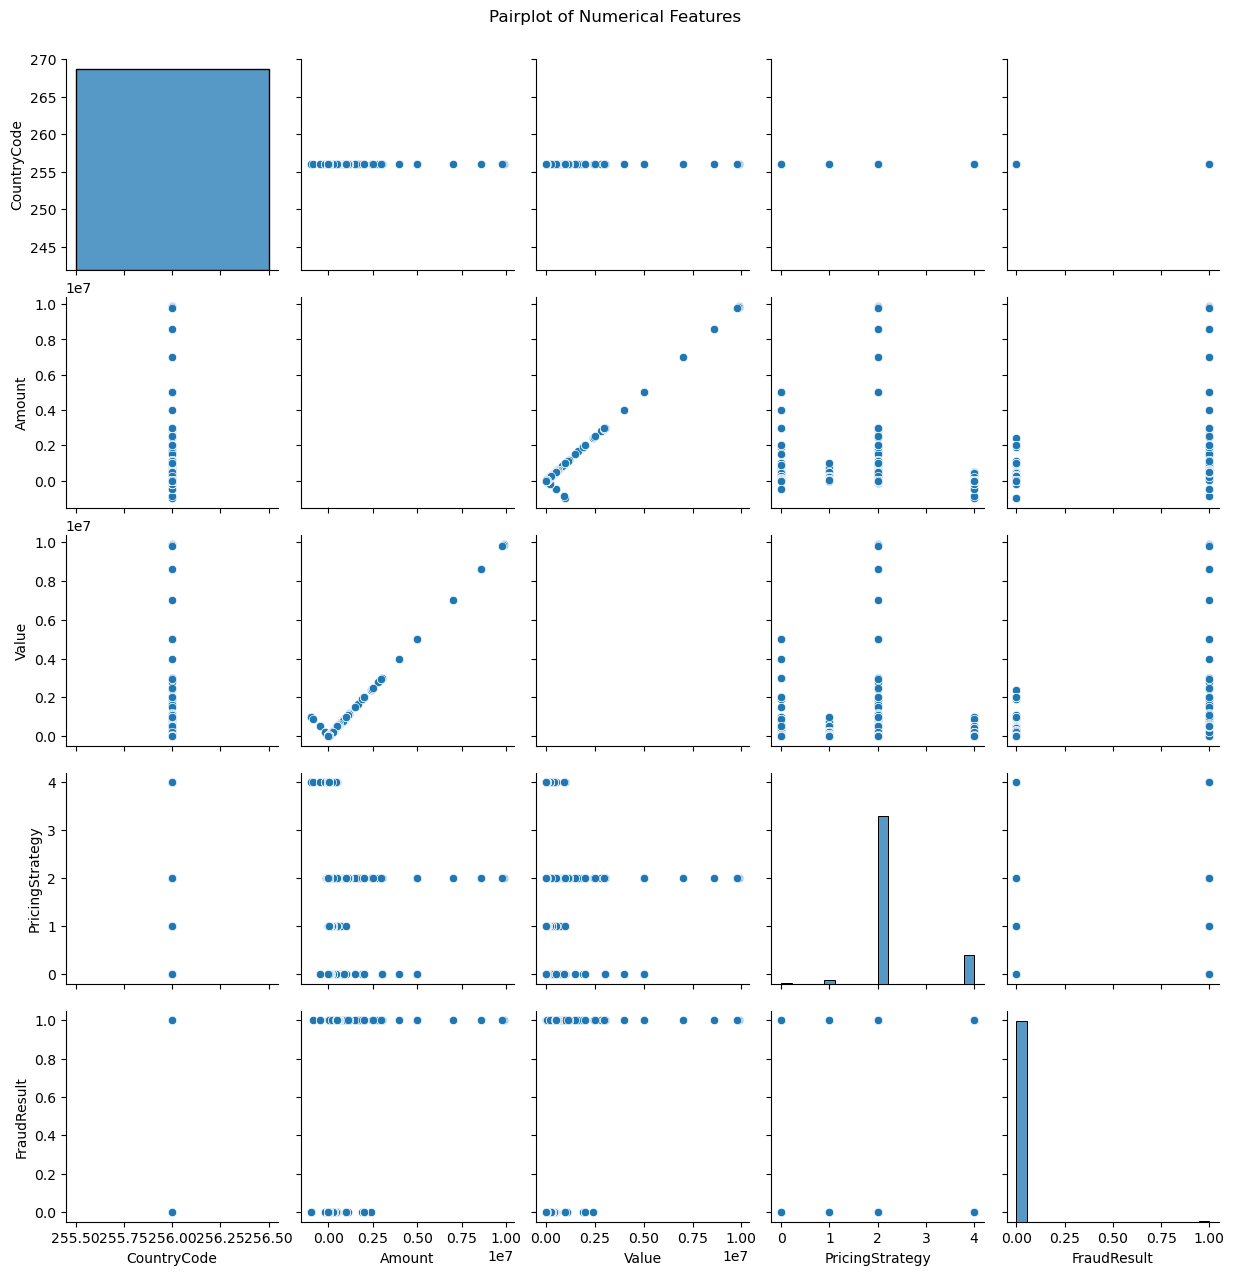

In [23]:
##Pairplots: For understanding relationships between multiple numerical features.
sns.pairplot(numeric_data.select_dtypes(include=['number']))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [24]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Category Counts for {column}:\n{df[column].value_counts()}\n")

Category Counts for TransactionId:
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
TransactionId_35670     1
Name: count, Length: 95662, dtype: int64

Category Counts for BatchId:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_23939      1
BatchId_104215     1
BatchId_116411     1
BatchId_36631      1
BatchId_29317      1
Name: count, Length: 94809, dtype: int64

Category Counts for AccountId:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_4180        1
AccountId_63          1
AccountId_3497        1
AccountId_2010        1
AccountId_1685        1
Name: co

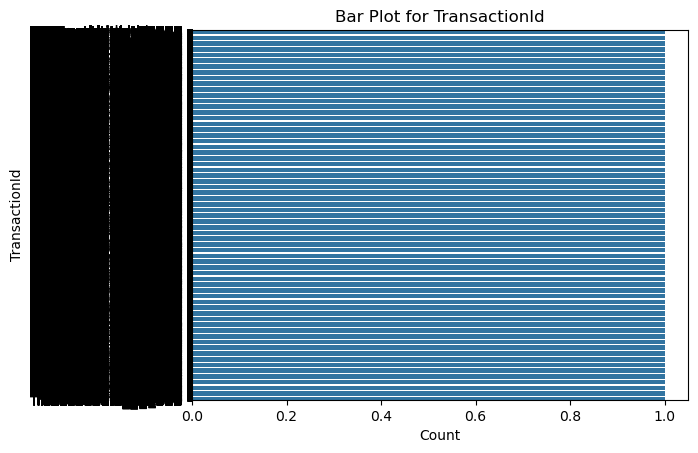

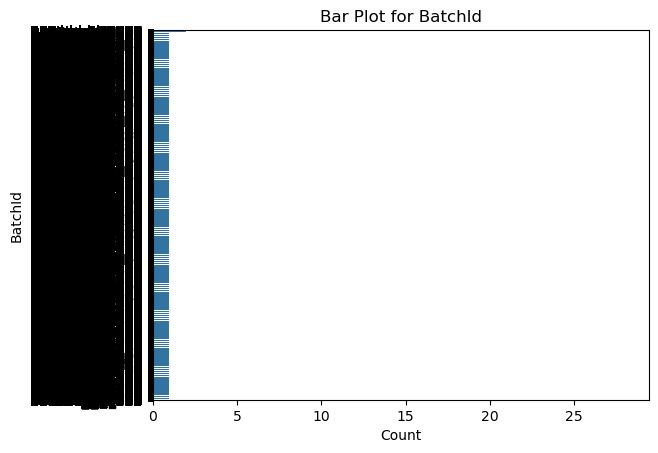

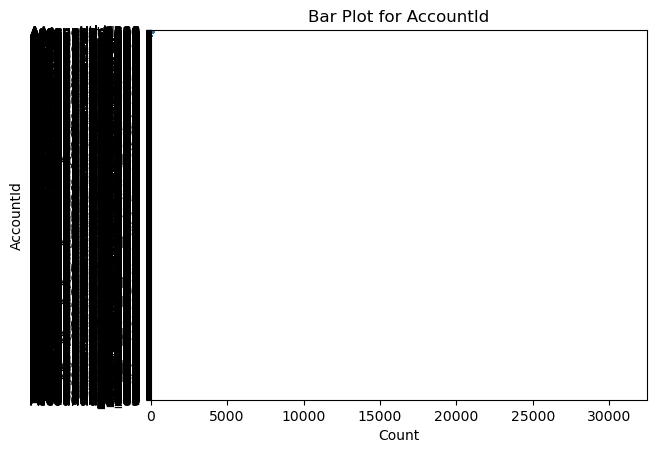

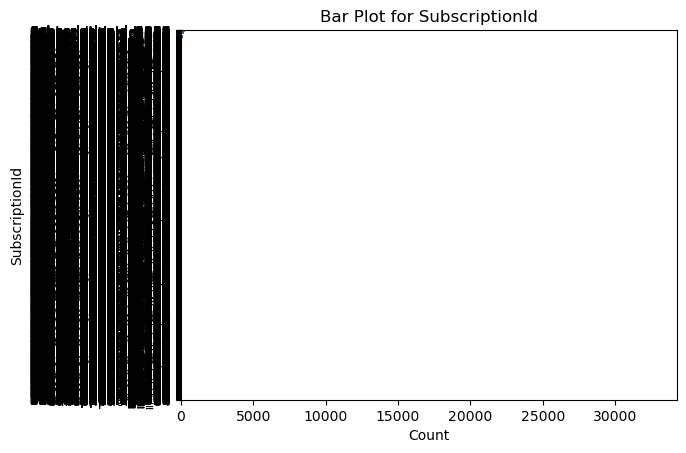

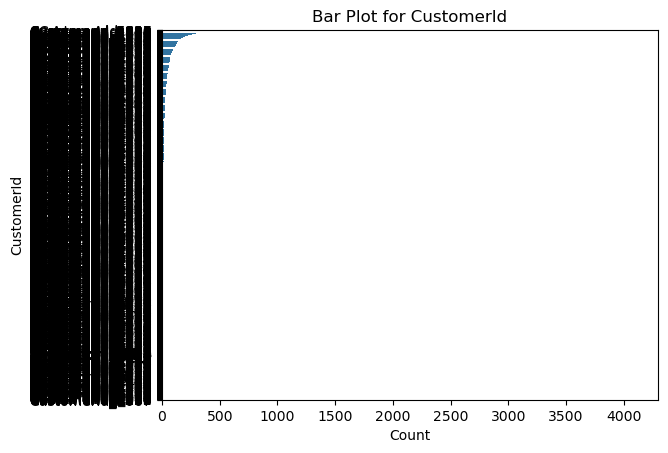

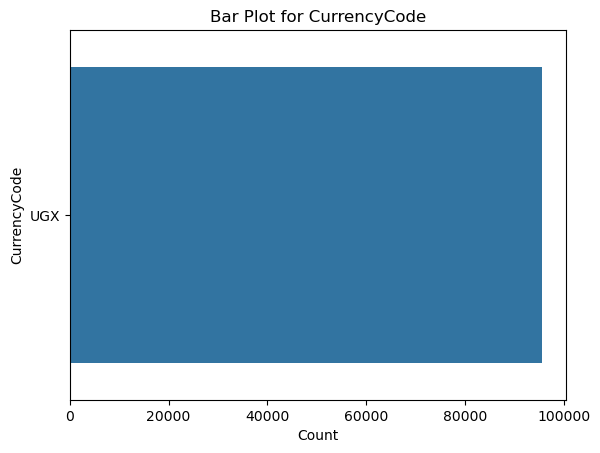

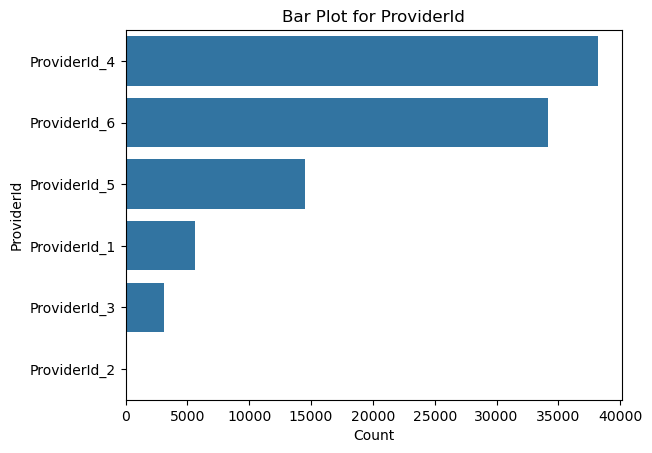

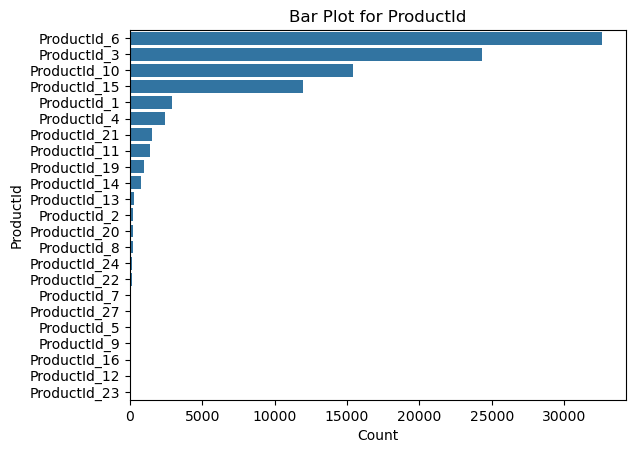

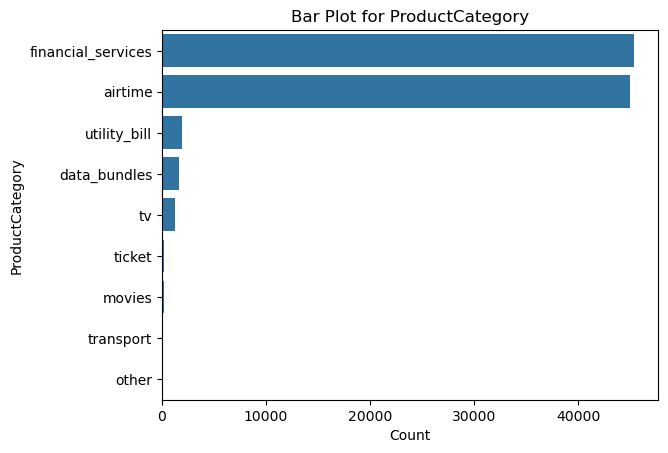

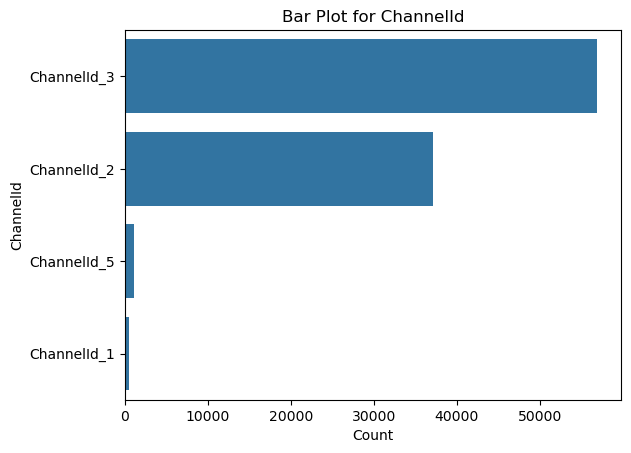

KeyboardInterrupt: 

In [26]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Bar Plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [27]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    percentages = df[column].value_counts(normalize=True) * 100
    print(f"Percentage Distribution for {column}:\n{percentages}\n")

Percentage Distribution for TransactionId:
TransactionId
TransactionId_76871     0.001045
TransactionId_74922     0.001045
TransactionId_2737      0.001045
TransactionId_28101     0.001045
TransactionId_33267     0.001045
                          ...   
TransactionId_32860     0.001045
TransactionId_139405    0.001045
TransactionId_65784     0.001045
TransactionId_8889      0.001045
TransactionId_35670     0.001045
Name: proportion, Length: 95662, dtype: float64

Percentage Distribution for BatchId:
BatchId
BatchId_67019     0.029270
BatchId_51870     0.016726
BatchId_113893    0.014635
BatchId_127204    0.012544
BatchId_116835    0.010453
                    ...   
BatchId_23939     0.001045
BatchId_104215    0.001045
BatchId_116411    0.001045
BatchId_36631     0.001045
BatchId_29317     0.001045
Name: proportion, Length: 94809, dtype: float64

Percentage Distribution for AccountId:
AccountId
AccountId_4841    32.293910
AccountId_4249     4.659112
AccountId_4840     1.816813
Account

In [28]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Feature: {column}")
    print(f"Unique Categories: {df[column].nunique()}")
    print(f"Most Frequent:\n{df[column].value_counts().head(1)}\n")
    print(f"Least Frequent:\n{df[column].value_counts().tail(1)}\n")
    print("-" * 50)

Feature: TransactionId
Unique Categories: 95662
Most Frequent:
TransactionId
TransactionId_76871    1
Name: count, dtype: int64

Least Frequent:
TransactionId
TransactionId_35670    1
Name: count, dtype: int64

--------------------------------------------------
Feature: BatchId
Unique Categories: 94809
Most Frequent:
BatchId
BatchId_67019    28
Name: count, dtype: int64

Least Frequent:
BatchId
BatchId_29317    1
Name: count, dtype: int64

--------------------------------------------------
Feature: AccountId
Unique Categories: 3633
Most Frequent:
AccountId
AccountId_4841    30893
Name: count, dtype: int64

Least Frequent:
AccountId
AccountId_1685    1
Name: count, dtype: int64

--------------------------------------------------
Feature: SubscriptionId
Unique Categories: 3627
Most Frequent:
SubscriptionId
SubscriptionId_3829    32630
Name: count, dtype: int64

Least Frequent:
SubscriptionId
SubscriptionId_84    1
Name: count, dtype: int64

-----------------------------------------------

In [29]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    percentages = df[column].value_counts(normalize=True) * 100
    print(f"Percentage Distribution for {column}:\n{percentages}\n")


Percentage Distribution for TransactionId:
TransactionId
TransactionId_76871     0.001045
TransactionId_74922     0.001045
TransactionId_2737      0.001045
TransactionId_28101     0.001045
TransactionId_33267     0.001045
                          ...   
TransactionId_32860     0.001045
TransactionId_139405    0.001045
TransactionId_65784     0.001045
TransactionId_8889      0.001045
TransactionId_35670     0.001045
Name: proportion, Length: 95662, dtype: float64

Percentage Distribution for BatchId:
BatchId
BatchId_67019     0.029270
BatchId_51870     0.016726
BatchId_113893    0.014635
BatchId_127204    0.012544
BatchId_116835    0.010453
                    ...   
BatchId_23939     0.001045
BatchId_104215    0.001045
BatchId_116411    0.001045
BatchId_36631     0.001045
BatchId_29317     0.001045
Name: proportion, Length: 94809, dtype: float64

Percentage Distribution for AccountId:
AccountId
AccountId_4841    32.293910
AccountId_4249     4.659112
AccountId_4840     1.816813
Account

In [30]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64